Epinions.com is a website where people can post reviews of products and services. It covers a wide variety of topics. For this case study, we downloaded a set of 600 posts about digital cameras and cars and saved as “Eopinions.csv”. 
The dataset has 2 columns: ‘class’ and ‘text’ 

These are the tasks which you have to perform:
•	Read the file as a pandas data-frame.

•	Perform Label Encoding on ‘class’ column.

•	Plot a bar graph to compare the frequencies of both the classes.

•	Preprocess the ‘text’ column

•	Vectorize the text using CountVectorizer

•	Split the dataset into 2 parts namely “train.csv” and “test.csv” having 80% and 20% of the data respectively from the original data. These are your Train and Test Data. Make sure train and test data are having same proportion of data points as the original data

•	Train your machine learning algorithm for classification and prepare a model (you can choose any appropriate algorithm of your choice)

•	Now test the model on the Test data and evaluate the Performance by providing Confusion Matrix for your model. 

•	Plot ROC Curve.


In [ ]:
import pandas as  pd
from sklearn.model_selection import cross_validate
from sklearn import model_selection 
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
! pip install PreProcess 
import nltk 
from nltk import word_tokenize 
from sklearn import preprocessing

In [3]:
df = pd.read_csv('Eopinions.csv')

In [4]:
df.head()

,class,text
0,Auto,I have recently purchased a J30T with moderat...
1,Camera,I bought this product because I need instant ...
2,Auto,I have owned my Buick since 53000 km and I am...
3,Camera,This was my first Digital camera so I did qui...
4,Camera,Minolta DiMAGE 7Hi is in a digital SLR with 5...


In [6]:
# Perform label encoding on class colulmn 
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df['Label']=le.fit_transform(df['class'])


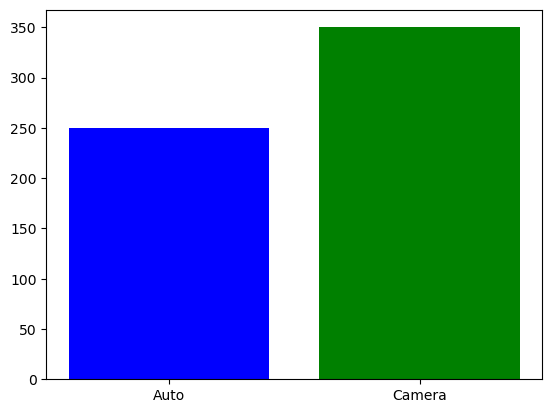

In [8]:
# Plot the bar graph to compare the frequencies of the both classes 
import matplotlib.pyplot as plt 
bars = []
count = []
for group,subset in df.groupby('class'):
    bars.append(group)
    count.append(len(subset))
    
plt.bar(range(len(bars)),count,color=['blue','green'],align='center')
plt.xticks(range(len(bars)),bars)
plt.show()

In [31]:
#Preprocess the text column 
from Preprocess import * 
df['Refined-Text']=df['text'].apply(Refine)

In [32]:
#Vectorize the text using CountVectorizer

#use previous Vectorization file made in earlier module
from Vectorization import *
df['Refined-Text-Vectorized']=CountVectorization(df['Refined-Text'])


In [38]:
#Split the dataset into 2 parts namely "train.csv" and "test_csv" having 80% and 20% of the data 
Data=df[['text','Refined-Text','Refined-Text-Vectorized']]
Target=df['Label']
X_train,X_test,y_train,y_test = train_test_split(Data,Target,test_size=0.2,random_state=0,stratify=Target)

#Training set 
train = pd.DataFrame(X_train)
train['Label']=y_train
train.index=range(len(train))
train.to_csv('Train.csv',index=False)

#Test Data 
test = pd.DataFrame(X_test)
test['Label']=y_test
test.index=range(len(test))
test.to_csv('Test.csv',index=False)



In [39]:
#Train your machine learning algorithm for classification and prepare a model

In [42]:
x_train=list(train['Refined-Text-Vectorized'])
y_train=list(train['Label'])

x_test=list(test['Refined-Text-Vectorized'])
y_test=list(test['Label'])

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, random_state=0)

In [44]:
# Now test the model on the Test data and evaluate the Performance by providing confusion Matrix for your model 
y_pred=clf.predict(x_test)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))


Confusion Matrix:
 [[50  0]
 [ 0 70]]



ROC Curve:



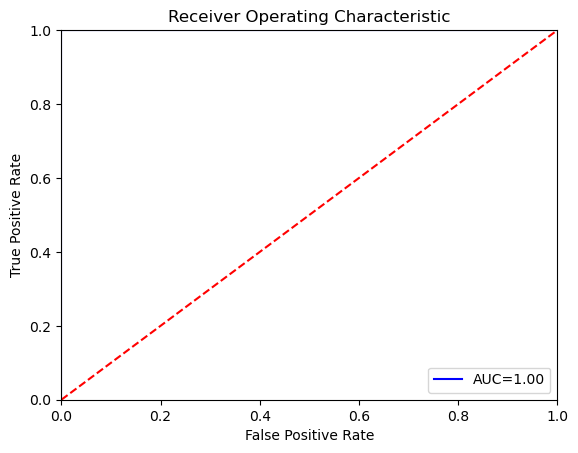

In [46]:
#Plot ROC Curve 
from sklearn import metrics 
print("\nROC Curve:\n")
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()